In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("meteo_analysis.csv", header=None, skiprows=8, nrows=4)
df

0       1          2          3          4           5           6   \
0   2    orig   0.044600   0.054215   0.069698    0.025708    0.052250   
1   2  orig_f   0.060859   0.055830   0.049634    0.058067    0.063120   
2   2     12h   0.000000   1.179863   1.072775    0.345314    0.000000   
3   2     60d  83.552589  85.836049  96.688450  118.970731  105.770883   

           7           8           9   ...          82         83         84  \
0    0.029105    0.048569    0.039969  ...    0.029083   0.055245   0.059987   
1    0.048981    0.045701    0.048261  ...    0.050619   0.056462   0.057135   
2    0.735188    0.000000    0.508704  ...    0.001746   0.039267   0.000000   
3  133.023274  244.881861  313.363753  ...  124.500840  74.455093  71.861087   

          85         86         87          88          89          90  \
0   0.018475   0.056345   0.068910    0.086140    0.047469    0.048778   
1   0.063326   0.056225   0.061448    0.060398    0.066367    0.051158   
2   0.000000   0.000000   0.000597    0.000000    2.961626    0.000000   
3  35.354198  62.728125  70.430494  103.133208  140.773196  178.146562   

           91  
0    0.044072  
1    0.051013  
2    0.000000  
3  212.262685  

[4 rows x 92 columns]

In [4]:
dfs = []
for i in range(17):
    dfs.append(pd.read_csv("meteo_analysis.csv", header=None, skiprows=i*4, nrows=4))
    
dfs[99]    

0     0
1     0
2     0
3     0
4     0
     ..
87    0
88    0
89    0
90    0
91    0
Length: 92, dtype: int64

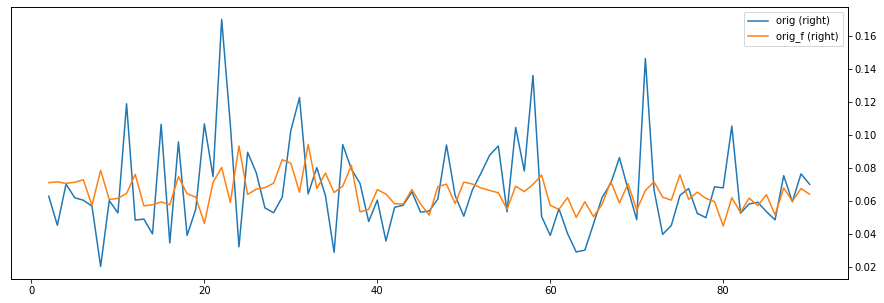

In [30]:
def plot_ts(df):
    df = df.loc[:,2:].T
    df.columns = ["orig", "orig_f", "12h", "60d"]
    df = df.drop(["12h", "60d"], axis=1)
    df.plot(figsize=(15,5), secondary_y=["orig", "orig_f"])
    
plot_ts(dfs[5])

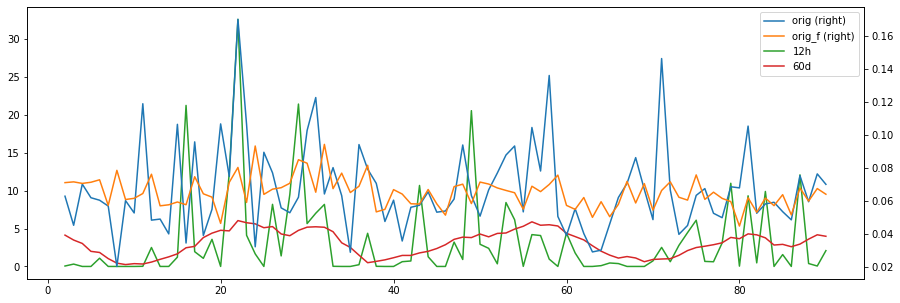

In [61]:
plot_ts(dfs[5])

## Plot original and meteo fitted timeseries

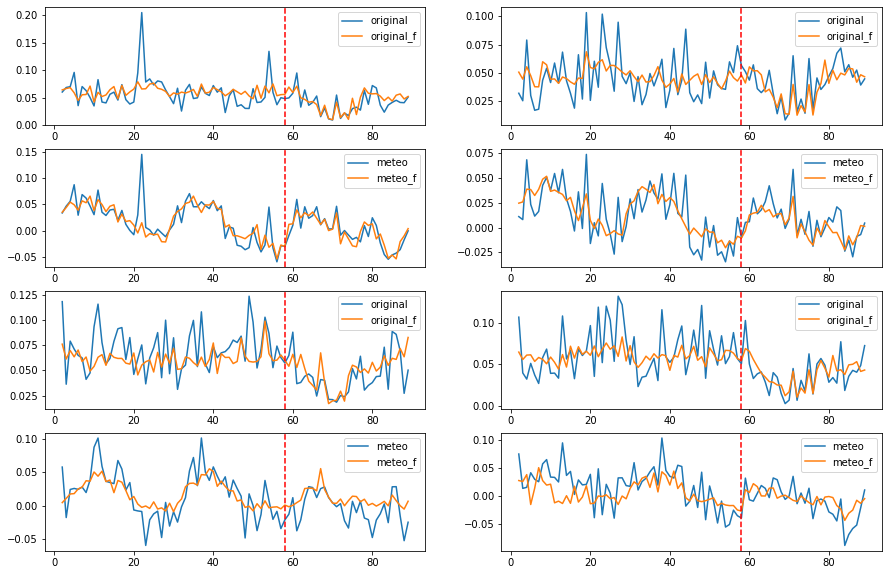

In [123]:
import matplotlib.pyplot as plt
fitted_meteo_df = pd.read_csv("../../timeseries.csv", header=None)

fig, ax=plt.subplots(4,2,figsize=(15,10))

for i in range(0, len(fitted_meteo_df.index), 2):
    df = fitted_meteo_df.loc[i:i+1,2:].T
    if i % 4 == 0:
        df.columns = ["original", "original_f"]
    else:
        df.columns = ["meteo", "meteo_f"]
    df.plot(ax=ax[(i//2)%4][i//8]).axvline(x=88*2//3, color="r", linestyle="--")

## Compute R-squared between precipitation data and backscattered signal

In [3]:
from sklearn.linear_model import LinearRegression

def r2_score(df):
    
    # get rid of na values
    df = df.dropna(axis=1)
    
    # feature array with the two precipitation ts
    p_ts_12h = np.array(df.iloc[2,2:], dtype=float)
    p_ts_60d = np.array(df.iloc[3,2:], dtype=float)
    X=np.transpose(np.vstack((p_ts_12h, p_ts_60d)))
    
    # target vector ts orig and ts origf
    y1=np.array(df.iloc[0,2:], dtype=float)
    y2=np.array(df.iloc[1,2:], dtype=float)
    
    # apply linear regression model
    reg1 = LinearRegression().fit(X, y1)
    reg2 = LinearRegression().fit(X, y2)
    
    return [reg1.score(X, y1), reg2.score(X, y2)]

In [58]:
dfs = []
for i in range(100):
    dfs.append(pd.read_csv("meteo_analysis.csv", header=None, skiprows=i*4, nrows=4))
    
dfs[99] 

0       1          2           3           4           5           6   \
0  100    orig   0.036824    0.045732    0.048589    0.035313    0.066266   
1  100  orig_f   0.044050    0.055003    0.061100    0.055499    0.057782   
2  100     12h   0.000000   19.204963    2.742500   28.936405    0.000000   
3  100     60d  95.812310  140.397801  170.235527  220.265927  265.222731   

           7           8           9   ...          83         84          85  \
0    0.043121    0.046582    0.016216  ...    0.073352   0.064724    0.097298   
1    0.046285    0.057845    0.045306  ...    0.051135   0.056212    0.061436   
2    1.053380   23.083891    0.593924  ...    0.000000   0.000000    0.752708   
3  328.451122  381.758950  504.302282  ...  113.204921  85.866611  126.818393   

           86          87          88          89          90         91  \
0    0.056210    0.046130    0.038268    0.057026    0.084189   0.030798   
1    0.049568    0.047788    0.042164    0.047016    0.056397   0.046438   
2    0.000000    0.000000    0.000000    0.000000    0.681153   0.311230   
3  159.051502  146.342221  170.914708  191.539876  158.294193  97.424555   

           92  
0    0.059842  
1    0.048654  
2    0.000000  
3  112.743714  

[4 rows x 93 columns]

In [4]:
from sklearn.linear_model import LinearRegression

def r2_score(df):
    
    # get rid of na values
    df = df.dropna(axis=1)
    
    # feature array with the two precipitation ts
    p_ts_12h = np.array(df.iloc[2,2:], dtype=float)
    p_ts_60d = np.array(df.iloc[3,2:], dtype=float)
    X=np.transpose(np.vstack((p_ts_12h, p_ts_60d)))
    
    # target vector ts orig and ts origf
    y1=np.array(df.iloc[0,2:], dtype=float)
    y2=np.array(df.iloc[1,2:], dtype=float)
    
    # apply linear regression model
    reg1 = LinearRegression().fit(X, y1)
    reg2 = LinearRegression().fit(X, y2)
    
    return [reg1.score(X, y1), reg2.score(X, y2)]

In [11]:
# compute r2 for 100 dfs
r2_list = list(map(r2_score, dfs))
np.average(r2_list, axis=0)

array([0.0303007 , 0.06860749])